In [5]:
# Import required libraries and functions
%matplotlib widget
import matplotlib.pyplot as plt
from photometry_preprocessing import * 
from photometry_smoothing import *
from photometry_correcting import * 
from photometry_eventanalysis import * 
from photometry_variationanalysis import *
import deeplabcut_returnanalysis as dlcra
from photometry_visualization import * 
from scipy import stats
from scalebars import *
import os
import pandas as pd 
import warnings
import scipy.signal as ss 
from matplotlib.lines import Line2D
from statsmodels.nonparametric import smoothers_lowess as sml
warnings.simplefilter(action='ignore', category=FutureWarning)
def get_mean(time, data, start, end): 
    idx = np.where((time>start) & (time<end))[0]
    mean = np.mean(data[idx])
    return mean

In [2]:
# List of all paths and times 
tail_pick_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-rf-stress-05092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-tailpicking_300s-08032022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-tailpicking300s_-220929-150559',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_tailpicking300s-221129-171018',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90_tailpicking300s-230302-153512']
tail_pick_fasted_times = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-rf-stress-05092022': 300,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-tailpicking_300s-08032022': 300,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-tailpicking300s_-220929-150559': 302,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_tailpicking300s-221129-171018': 300,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90_tailpicking300s-230302-153512': 300}

food_drop_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022', 
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_fooddrop_600s(repeat)-221004-151237',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_fooddrop_600s-230309-154041']

food_drop_fasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_fooddrop_600s(repeat)-221004-151237': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_fooddrop_600s-230309-154041': 603}

food_drop_fasted_eat = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022': 626,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022': 639,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_fooddrop_600s(repeat)-221004-151237': 603,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_fooddrop_600s-230309-154041': 620}

food_drop_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_fooddrop_600s_221002-144116',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fed)_600-221130-141112',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_fooddrop_600s-230302-151444']
food_drop_unfasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022': 603,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_fooddrop_600s_221002-144116':603,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fed)_600-221130-141112': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_fooddrop_600s-230302-151444': 605}
food_drop_unfasted_eat = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022': 666,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022': 616,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_fooddrop_600s_221002-144116': 660}

ob_drop_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-obdrop-05212022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_fasted_600s-08072022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_objectdrop_600s_-221004-144010',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_object drop(fasted)_600s-221201-125838',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_obdrop_600s-230309-151957']
ob_drop_fasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-obdrop-05212022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_fasted_600s-08072022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_objectdrop_600s_-221004-144010': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_object drop(fasted)_600s-221201-125838': 599,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_obdrop_600s-230309-151957': 601}

ob_drop_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-non_fasted-obdrop-05222022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_nonfasted_600s-08082022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_objectdrop_600s_221002-150257',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_object drop(fed)_600s-221130-135015',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_obdrop_600s-230311-125104']
ob_drop_unfasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-non_fasted-obdrop-05222022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_nonfasted_600s-08082022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_objectdrop_600s_221002-150257': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_object drop(fed)_600s-221130-135015': 598,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_obdrop_600s-230311-125104': 600}

tea_ball_food_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_fooddrop_600s_1800s_221006-164549',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_fooddrop_600s_1800s-221203-164840',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_fooddrop_600s_1800s-230310-152213']
tea_ball_food_fasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_fooddrop_600s_1800s_221006-164549': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_fooddrop_600s_1800s-221203-164840': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_fooddrop_600s_1800s-230310-152213': 604}
tea_ball_food_fasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022': 1802,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022': 1801,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_fooddrop_600s_1800s_221006-164549': 1803,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_fooddrop_600s_1800s-221203-164840': 1800,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_fooddrop_600s_1800s-230310-152213': 1800}

tea_ball_object_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_objectdrop_600s_1800s_221006-155455',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_objectdrop_600s_1800s-221203-155705',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_objectdrop_600s_1800s-230310-142802']
tea_ball_object_fasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_objectdrop_600s_1800s_221006-155455': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_objectdrop_600s_1800s-221203-155705': 598,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_objectdrop_600s_1800s-230310-142802': 601}
tea_ball_object_fasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022': 1816,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022': 1801,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_objectdrop_600s_1800s_221006-155455': 1804,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_objectdrop_600s_1800s-221203-155705': 1798,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_objectdrop_600s_1800s-230310-142802': 1802}

tea_ball_food_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_fooddrop_600s_1800s_-221008-160224',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_fooddrop_600s_1800s_221202-144351',
    '/scratch/rhs112/PVN_GLP1Rretro-gcamp6f-DMV-PVN-#90-unfasted_teaball_fooddrop_600s_1800s-230311-140436']
tea_ball_food_unfasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_fooddrop_600s_1800s_-221008-160224': 609,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_fooddrop_600s_1800s_221202-144351': 600,
    '/scratch/rhs112/PVN_GLP1Rretro-gcamp6f-DMV-PVN-#90-unfasted_teaball_fooddrop_600s_1800s-230311-140436': 600}
tea_ball_food_unfasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022': 1829,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022': 1802,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_fooddrop_600s_1800s_-221008-160224': 1798,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_fooddrop_600s_1800s_221202-144351': 1801,
    '/scratch/rhs112/PVN_GLP1Rretro-gcamp6f-DMV-PVN-#90-unfasted_teaball_fooddrop_600s_1800s-230311-140436': 1802}

tea_ball_object_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_objectdrop_600s_1800s_-221005-163952',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_objectdrop_600s_1800s_-221202-132401',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_teaball_objectdrop_600s_1800s-230311-131337']
tea_ball_object_unfasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_objectdrop_600s_1800s_-221005-163952': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_objectdrop_600s_1800s_-221202-132401': 599,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_teaball_objectdrop_600s_1800s-230311-131337': 602}
tea_ball_object_unfasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022': 1809,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022': 1806,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-unfasted_teaball_objectdrop_600s_1800s_-221005-163952': 1800,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fed_teaball_objectdrop_600s_1800s_-221202-132401': 1798,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-unfasted_teaball_objectdrop_600s_1800s-230311-131337': 1801}

In [ ]:
# Filter, correct, and normalize data for experiments
for path in tea_ball_food_fasted:
    print(path)
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        ds_signal = ds_signal[:-1]
        ds_time = ds_time[:-1]
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    view_window = [-30,60]
    epoc = [tail_pick_fasted_times[path] - 5 ]
    fig, ax = plt.subplots()
    savepath = f'{path}/TailPickData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=dFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-15, baseline_end=-5, view_window=view_window)
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', view_window)


In [ ]:
### FOR GROOMING ANNOTATIONS
# Filter, correct, and normalize data for experiments
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
#all_paths = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted] for path in folder]

for path in all_paths:
    print(path)
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        ds_signal = ds_signal[:-1]
        ds_time = ds_time[:-1]
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    view_window = [-60,180]
    for file in os.listdir(path):
        if file.endswith('avi'):
            annotate_file = file.rsplit('.avi')[0]
    behavior_loc = f'/scratch/rhs112/annotate_vids/{annotate_file}/behaviors.yml'
    with open(behavior_loc, 'r') as f:
        behaviors=yaml.load(f, Loader=yaml.FullLoader)
    
    epoc = [grooming-8 for grooming in behaviors['grooming_onset'] if (grooming > 60) and (grooming < 2800)]
    fig, ax = plt.subplots()
    savepath = f'{path}/GroomingOnsetData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=dFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-60, baseline_end=0, view_window=view_window)
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', view_window)



In [ ]:
# Perform group analysis and viz of multiple drop experiments (plot together)

from matplotlib.lines import Line2D


fig, ax = plt.subplots(1, figsize=(10,5))
ds=3

fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted] for path in folder]
all_paths = [path for folder in [unfasted, fasted] for path in folder]
all_paths = tea_ball_food_fasted
behaviorfileending = '/GroomingOnsetDataMean.h5'
ffddf, initmean, sem = group_analysis(all_paths, behaviorfileending, shade='sem')
print(ffddf)
ffdmean = initmean[:-1][::ds]
ffddf = ffddf.dropna()
ffdsem = sem[:-1][::ds]


# #UNFASTED FOOD DROP 
# behaviorfileending = '/GroomingOnsetData.h5'
# ufddf, initmean, sem = group_analysis(unfasted, behaviorfileending, shade='sem')
# ufdmean = initmean[:-1][::ds]
# ufddf = ufddf.dropna()#
# ufdsem = sem[:-1][::ds]


view_window = [-60, 180]
ftime = np.linspace(view_window[0], view_window[1], num=len(ffdmean))
# utime = np.linspace(view_window[0], view_window[1], num=len(ufdmean))

ffdmean = ss.savgol_filter(ffdmean, window_length=7, polyorder=6)
ffdmean = moving_average(ffdmean, window_size=5)
ffdmean = sml.lowess(ffdmean, ftime, frac=0.001, it=10, return_sorted=False)
# ufdmean = ss.savgol_filter(ufdmean, window_length=7, polyorder=6)
# ufdmean = moving_average(ufdmean, window_size=5)
# ufdmean = sml.lowess(ufdmean, utime, frac=0.001, it=10, return_sorted=False)

ax.plot(ftime, ffdmean, linewidth=2.5, color='green', alpha=0.6)
ax.fill_between(ftime, ffdmean-ffdsem, ffdmean+ffdsem, color='green', alpha=0.1)
ffd_n = len(ffddf.columns)

# ax.plot(utime, ufdmean, linewidth=2.5, color='indigo', alpha=0.6)
# ax.fill_between(utime, ufdmean-ufdsem, ufdmean+ufdsem, color='indigo', alpha=0.1)
# ufd_n = len(ufddf.columns)


hl_list = [handle_label for handle_label in ax.get_legend_handles_labels()]
legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Fasted, n={ffd_n}')]#,
                #   Line2D([0], [0], color = 'indigo', lw=3, label=f'Unfasted, n={ufd_n}')]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.axvline(240, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-10.25, -0.685, 'Onset of Grooming')
sb = add_scalebar(ax, matchx=False, sizex=15, labelx='15 Seconds', matchy=False, sep=4, sizey=0.5, labely='0.5 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

#plt.savefig('Grooming_Onset_Trace.pdf')


In [ ]:
fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted] for path in folder]
all_paths = [path for folder in [unfasted, fasted] for path in folder]
behaviorfileending = '/GroomingOnsetData.h5'
window = [-60, 180]
# for path in all_paths:
#     df = pd.read_hdf(path + behaviorfileending)
#     df['mean'] = df.mean(axis=1)
#     df1 = df['mean'].to_frame()
#     print(type(df1))
#     df1.to_hdf(path + '/GroomingOnsetDataMean.h5', key='df', mode='w') 

    
for i in range(len(tea_ball_food_fasted)):
    print(tea_ball_food_fasted[i])
    poi = [tea_ball_food_fasted[i], tea_ball_food_unfasted[i], tea_ball_object_fasted[i], tea_ball_object_unfasted[i]]
    df = pd.DataFrame()
    for j in range(len(poi)):
        df_temp = pd.read_hdf(poi[j] + behaviorfileending)
        df = pd.concat([df, df_temp], axis=1)
       # df[f'{i}'] = df_temp.mean(axis=1)
    df_mean = df.mean(axis=1).to_frame()
    df_mean.to_hdf(tea_ball_food_fasted[i] + '/GroomingOnsetDataMean.h5', key='df', mode='w')
    
    print(df_mean)



In [ ]:
path_and_point = {}
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
paths = [x + '/TailPickData.h5' for x in tail_pick_fasted]

for path in paths:
    data = pd.read_hdf(path)
    animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
    path_and_point[float(data.iloc[0])] = animalID
print(path_and_point)


In [ ]:
# Generate heatmap for tail pick experiments
path_and_point = {}
paths = [x + '/TailPickData.h5' for x in tail_pick_fasted]

for path in paths:
    data = pd.read_hdf(path)
    print(len(data))
#     animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
#     path_and_point[float(data.iloc[0])] = animalID
# print(path_and_point)
# path_and_point = {-0.45105910301208496: '109', 
#                      -1.2661453485488892: '#1', 
#                      0.2098831832408905: '#3(#28)', 
#                      -1.8734426498413086: '#4(#61)', 
#                      0.2509443461894989: '#90'}

# df, initmean, sem = group_analysis(paths,'', shade='sem')
# df = df[:-1]
# initmean = initmean[:-1]
# sem = sem[:-1]
# zall = df.T.to_numpy()
# zall=zall[np.nanmean(zall[:,150:250],axis=1).argsort()][::-1]

# TRANGE = [-15,30]
# fig, ax1 = plt.subplots()
# cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
#                 extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3, vmax=3)
# cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
# ax1.set_title('Tail Pick Trial Heatmap')


# #ax1.set_ylabel('Trials')
# trials = np.arange(0, np.shape(zall)[0]) + 0.5
# ax1.set_yticks(trials)
# triallabels = trials + 0.5
# triallabels = [int(x) for x in triallabels]
# ax1.set_yticklabels(np.flip([*path_and_point.values()]))
# ax1.set_xlabel('Event-Aligned Time')
# ax1.set_ylabel('Animal')
# plt.subplots_adjust(left=0.16)
# plt.savefig('TailPickHeatmap.pdf', dpi=600)

In [ ]:
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
paths = [x + '/GroomingOnsetData.h5' for x in all_paths]
df, initmean, sem = group_analysis(paths,'', shade='sem')

In [ ]:
path_and_point = {}
fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted] for path in folder]
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
paths = [x + '/GroomingOnsetDataMean.h5' for x in tea_ball_food_fasted]

df, initmean, sem = group_analysis(paths,'', shade='sem')

zall = df.T.to_numpy()
# t = []
# for arr in zall:
#     mean = np.mean(arr[400:500])
#     t.append(mean)
# sorted_indx = np.argsort(t)
# print(sorted_indx)
# zall = zall[sorted_indx]
# # idx = [1, 3, 4, 0, 2, 9, 6, 5, 8, 7]
# # idx2 = [1, 3, 4, 0, 2, 7, 8, 5, 6, 9]
# # zall = zall[idx2]

#zall=zall[np.nanmean(zall[:,600:1200],axis=1).argsort()][::-1]

TRANGE = [-60,180]
fig, ax1 = plt.subplots(figsize=(10,5))
cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3,vmax=3)
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
ax1.set_title('Grooming Onset Heatmap')


# trials = np.arange(0, np.shape(zall)[0]) + 0.5
# ax1.set_yticks(trials)
# triallabels = trials + 0.5
# triallabels = [int(x) for x in triallabels]
ax1.set_xlabel('Event-Aligned Time (s)')
ax1.set_ylabel('Recording')
plt.subplots_adjust(left=0.15)


#plt.axvline(x=1200, c='black', lw=0.6)




In [ ]:
path_and_point = {}
fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted] for path in folder]
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
paths = [x + '/GroomingOffsetData.h5' for x in fasted]

df, initmean, sem = group_analysis(paths,'', shade='sem')

zall = df.T.to_numpy()
t = []
for arr in zall:
    mean = np.mean(arr[400:500])
    t.append(mean)
sorted_indx = np.argsort(t)
zall = zall[sorted_indx]
# idx = [1, 3, 4, 0, 2, 9, 6, 5, 8, 7]
# idx2 = [1, 3, 4, 0, 2, 7, 8, 5, 6, 9]
# zall = zall[idx2]

#zall=zall[np.nanmean(zall[:,600:1200],axis=1).argsort()][::-1]

TRANGE = [-40,60]
fig, ax1 = plt.subplots(figsize=(10,5))
cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3, vmax=3)
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
ax1.set_title('Grooming Offset Heatmap')


# trials = np.arange(0, np.shape(zall)[0]) + 0.5
# ax1.set_yticks(trials)
# triallabels = trials + 0.5
# triallabels = [int(x) for x in triallabels]
ax1.set_xlabel('Event-Aligned Time (s)')
ax1.set_ylabel('Recording')
plt.subplots_adjust(left=0.15)


#plt.axvline(x=1200, c='black', lw=0.6)




In [ ]:
# Generate heatmap for tail pick experiments
path_and_point = {}
paths = [x + '/GroomingOnsetData.h5' for x in tail_pick_fasted]

for path in paths:
    data = pd.read_hdf(path)
    print(len(data))
    animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
    path_and_point[float(data.iloc[0])] = animalID
print(path_and_point)
path_and_point = {-0.45105910301208496: '109', 
                     -1.2661453485488892: '#1', 
                     0.2098831832408905: '#3(#28)', 
                     -1.8734426498413086: '#4(#61)', 
                     0.2509443461894989: '#90'}

df, initmean, sem = group_analysis(paths,'', shade='sem')
df = df[:-1]
initmean = initmean[:-1]
sem = sem[:-1]
zall = df.T.to_numpy()
zall=zall[np.nanmean(zall[:,150:250],axis=1).argsort()][::-1]

TRANGE = [-15,30]
fig, ax1 = plt.subplots()
cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3, vmax=3)
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
ax1.set_title('Tail Pick Trial Heatmap')


#ax1.set_ylabel('Trials')
trials = np.arange(0, np.shape(zall)[0]) + 0.5
ax1.set_yticks(trials)
triallabels = trials + 0.5
triallabels = [int(x) for x in triallabels]
ax1.set_yticklabels(np.flip([*path_and_point.values()]))
ax1.set_xlabel('Event-Aligned Time')
ax1.set_ylabel('Animal')
plt.subplots_adjust(left=0.16)
plt.savefig('TailPickHeatmap.pdf', dpi=600)

In [ ]:
# Generate heatmap for chow/object drop experiments
path_and_point = {}
fooddropf = [x + '/FoodDropData.h5' for x in ob_drop_fasted]
obdropf = [x + '/FoodDropData.h5' for x in ob_drop_unfasted]
obdropfasted = [x + '/FoodDropData.h5' for x in food_drop_unfasted]
paths = [path for paths in [fooddropf, obdropf] for path in paths]
#fileending = '/FoodDropData.h5'


for path in obdropf:
    data = pd.read_hdf(path)
    print(len(data))
    if path != obdropfasted[-1]: 
        animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
    else: 
        animalID = '#6'
    path_and_point[float(data.iloc[0])] = animalID
print(path_and_point)

df, initmean, sem = group_analysis(paths,'', shade='sem')


# FOR FOOD DROPS 
#path_and_point = {0.06990870833396912: '#1 Fasted', 
#                      -0.19056439399719238: '#2 Fasted', 
#                      -0.24346542358398438: '#3 Fasted', 
#                      0.6865646839141846: '#4 Fasted', 
#                      -0.7688159942626953: '#5 Fasted',
#                   0.27782076597213745: '#1 Unfasted', 
#                      -0.25344765186309814: '#2 Unfasted', 
#                      0.016625821590423584: '#3 Unfasted', 
#                      0.5580539703369141: '#4 Unfasted', 
#                      -0.6058946251869202: '#5 Unfasted'}
# FOR OBJECT DROPS 
path_and_point = {0.10238033533096313: '#1 Fasted', 
                  -0.964443564414978: '#2 Fasted', 
                  -0.10453048348426819: '#3 Fasted', 
                  -2.17254638671875: '#4 Fasted', 
                  0.6009753942489624: '#5 Fasted',
                  -0.0043332576751708984: '#1 Fed', 
                  -0.04773302376270294: '#2 Fed', 
                  0.1863977313041687: '#3 Fed', 
                  -0.2884167432785034: '#4 Fed', 
                  0.7780970335006714: '#5 Fed'}


zall = df.T.to_numpy()
# zall=zall[np.nanmean(zall[:,300:400],axis=1).argsort()][::-1]
TRANGE = [-30,60]
fig, ax1 = plt.subplots(figsize=(10,5))
cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3, vmax=3)
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
ax1.set_title('Object Drop Heatmap')
ax1.axhline(y=5, c='black', lw=3)

trials = np.arange(0, np.shape(zall)[0]) + 0.5
ax1.set_yticks(trials)
triallabels = trials + 0.5
triallabels = [int(x) for x in triallabels]
ax1.set_yticklabels(np.flip([*path_and_point.values()]))
ax1.set_xlabel('Event-Aligned Time (s)')
ax1.set_ylabel('Animal')
plt.subplots_adjust(left=0.15)


# #plt.savefig('InaccessibleFoodTeaBallHeatmap.pdf', dpi=1800)
#plt.savefig('ObjectDropHeatmap.pdf', dpi=600)


#df

In [ ]:
# Generate heatmap for tea ball experiments

# Generate heatmap for chow/object drop experiments
path_and_point = {}
fooddropf = [x + '/FoodDropData.h5' for x in food_drop_fasted]
obdropf = [x + '/FoodDropData.h5' for x in food_drop_unfasted]
paths = [path for paths in [fooddropf, obdropf] for path in paths]
#fileending = '/FoodDropData.h5'


for path in fooddropf:
    data = pd.read_hdf(path)
    if path != obdropf[-1]: 
        animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
    #else: 
    #    animalID = '#6'
    path_and_point[float(data.iloc[0])] = animalID
print(path_and_point)

df, initmean, sem = group_analysis(paths,'', shade='sem')

# OBJECT TEA BALL INACCESSIBLE
# path_and_point = {1.6683157682418823: '#1 Fasted', 
#                   1.0803494453430176: '#2 Fasted', 
#                   -0.43414369225502014: '#3 Fasted', 
#                   -0.5411659479141235: '#4 Fasted', 
#                   2.265768051147461: '#5 Fasted',
#                  -0.09469091892242432: '#1 Fed', 
#                   -0.29759037494659424: '#2 Fed', 
#                   -0.35033780336380005: '#3 Fed', 
#                   -0.2162073850631714: '#4 Fed', 
#                   0.4191433787345886: '#5 Fed'}


# path_and_point = {-0.1249692440032959: '#1 Fasted', 
#                      -1.1085782051086426: '#2 Fasted', 
#                      -0.42861372232437134: '#3 Fasted', 
#                      -0.47284364700317383: '#4 Fasted', 
#                      -1.7103420495986938: '#5 Fasted',
#                     1.277791976928711: '#1 Unfasted', 
#                      -0.22144672274589539: '#2 Unfasted', 
#                      -0.3311895728111267: '#3 Unfasted', 
#                      -1.263651728630066: '#4 Unfasted', 
#                      -1.062624216079712: '#5 Unfasted'}

# path_and_point = {0.7962356209754944: '#1 Fasted', 
#                   0.8181652426719666: '#2 Fasted', 
#                   -0.2696346938610077: '#3 Fasted', 
#                   -0.19148749113082886: '#4 Fasted', 
#                   -0.7185720205307007: '#5 Fasted', 
#                   0.2309476137161255: '#1 Fed', 
#                     0.16016560792922974: '#2 Fed', 
#                   0.0722547173500061: '#3 Fed', 
#                   0.028790533542633057: '#4 Fed', 
#                   2.479198932647705: '#5 Fed'}

zall = df.T.to_numpy()
# #zall=zall[np.nanmean(zall[:,600:1200],axis=1).argsort()][::-1]
TRANGE = [-60,180]
fig, ax1 = plt.subplots(figsize=(10,5))
cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmin=-3.2, vmax=3)
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
ax1.set_title('Object Drop Tea Ball Heatmap')

trials = np.arange(0, np.shape(zall)[0]) + 0.5
ax1.set_yticks(trials)
triallabels = trials + 0.5
triallabels = [int(x) for x in triallabels]
ax1.set_yticklabels(np.flip([*path_and_point.values()]))
ax1.set_xlabel('Event-Aligned Time (s)')
ax1.set_ylabel('Animal')
plt.subplots_adjust(left=0.15)

#plt.savefig('ObjectDropHeatmap.pdf', dpi=600)


# # #df


In [ ]:
zall.shape

In [ ]:
# Generate heatmap for tea ball experiments

# Generate heatmap for chow/object drop experiments
path_and_point = {}
fooddropf = [x + '/TeaBallData.h5' for x in tea_ball_food_fasted]
obdropf = [x + '/TeaBallData.h5' for x in tea_ball_food_unfasted]
paths = [path for paths in [fooddropf, obdropf] for path in paths]
#fileending = '/FoodDropData.h5'


for path in obdropf:
    data = pd.read_hdf(path)
    print(len(data))
    if path != obdropf[-1]: 
        animalID = path.split('/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-')[1].split('-')[0]
    else: 
        animalID = '#6'
    path_and_point[float(data.iloc[0])] = animalID
print(path_and_point)

df, initmean, sem = group_analysis(paths,'', shade='sem')


path_and_point = {-0.1249692440032959: '#1 Fasted', 
                     -1.1085782051086426: '#2 Fasted', 
                     -0.42861372232437134: '#3 Fasted', 
                     -0.47284364700317383: '#4 Fasted', 
                     -1.7103420495986938: '#5 Fasted',
                    1.277791976928711: '#1 Unfasted', 
                     -0.22144672274589539: '#2 Unfasted', 
                     -0.3311895728111267: '#3 Unfasted', 
                     -1.263651728630066: '#4 Unfasted', 
                     -1.062624216079712: '#5 Unfasted'}






zall = df.T.to_numpy()
idx = [1, 3, 4, 0, 2, 9, 6, 5, 8, 7]
idx2 = [1, 3, 4, 0, 2, 7, 8, 5, 6, 9]
print(zall.shape)
#zall = zall[idx2]

#zall=zall[np.nanmean(zall[:,600:1200],axis=1).argsort()][::-1]

# TRANGE = [-60,180]
# fig, ax1 = plt.subplots(figsize=(10,5))
# cs = ax1.imshow(zall, cmap='coolwarm', interpolation='none', aspect="auto",
#                 extent=[TRANGE[0], TRANGE[1], 0, np.shape(zall)[0]], vmax=3)
# cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
# ax1.set_title('Inaccesible Tea Ball Heatmap')


# trials = np.arange(0, np.shape(zall)[0]) + 0.5
# ax1.set_yticks(trials)
# triallabels = trials + 0.5
# triallabels = [int(x) for x in triallabels]
# ax1.set_yticklabels(np.flip([*path_and_point.values()]))
# ax1.set_xlabel('Event-Aligned Time (s)')
# ax1.set_ylabel('Animal')
# plt.subplots_adjust(left=0.15)


# #plt.axvline(x=1200, c='black', lw=0.6)
# #plt.savefig('InaccessibleFoodTeaBallHeatmap.pdf', dpi=1800)
# plt.savefig('InaccessibleHeatmap.pdf', dpi=600)


#df



In [ ]:
# Perform group analysis and viz of tail pick experiments

behaviorfileending = '/TailPickData.h5'



dff, initmean, fsem = group_analysis(tail_pick_fasted, behaviorfileending, shade='sem')
fmean = initmean[:-1][::3]
dff = dff.dropna()
fsem = fsem[:-1][::3]


#odf, initmean, osem = group_analysis(pvn_tail_pick, behaviorfileending, shade='sem')
#omean = initmean[:-1][::3]
#odf = odf.dropna()
#osem = osem[:-1][::3]


fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-15, 30]
ftime = np.linspace(view_window[0], view_window[1], num=len(fmean))
fmean = fmean
fn = len(dff.columns)

#otime = np.linspace(view_window[0], view_window[1], num=len(omean))
#omean = omean #- 0.7
#on = len(odf.columns)


fmean = ss.savgol_filter(fmean, window_length=4, polyorder=3)
fmean = moving_average(fmean, window_size=5)
fmean = sml.lowess(fmean, ftime, frac=0.005, it=10, return_sorted=False)

#omean = ss.savgol_filter(omean, window_length=5, polyorder=4)
#omean = moving_average(omean, window_size=5)
#omean = sml.lowess(omean, otime, frac=0.005, it=10, return_sorted=False)

ax.plot(ftime, fmean, linewidth=1.5, color='green', alpha=0.6)
ax.fill_between(ftime, fmean-fsem, fmean+fsem, color='green', alpha=0.1)
#ax.plot(otime, omean, linewidth=1.5, color='dimgray', alpha=0.6)
#ax.fill_between(otime, omean-osem, omean+osem, color='dimgray', alpha=0.1)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'DVC Projecting PVN GLP-1R, n={fn}')]#, Line2D([0], [0], color = 'black', lw=3, label=f'All PVN GLP-1R, n={on}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-3, -2.15, 'Tail Pick')
sb = add_scalebar(ax, matchx=False, sizex=10, labelx='10 Seconds', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


#plt.savefig('TailPickFigure.pdf', dpi=600)

In [ ]:
#Perform group analysis and viz of chow or object drop experiments

behaviorfileending = '/FoodDropData.h5'

df, initmean, sem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]


fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-30, 60]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-50, -1.55, 'Presentation')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))





In [ ]:
#Perform group analysis and viz of teaball experiments 
behaviorfileending = '/TeaBallData.h5'
dff, initmean, fsem = group_analysis(tea_ball_food_fasted, behaviorfileending, shade='sem')
fmean = initmean[:-1][::3]
dff = dff.dropna()
fsem = fsem[:-1][::3]


behaviorfileending = '/TeaBallData.h5'
odf, initmean, osem = group_analysis(tea_ball_object_fasted, behaviorfileending, shade='sem')
omean = initmean[:-1][::3]
odf = odf.dropna()
osem = osem[:-1][::3]


fig, ax = plt.subplots(1, figsize=(10,5))


view_window=[-300, 600]
ftime = np.linspace(view_window[0], view_window[1], num=len(fmean))
fmean = fmean #+ 1

fn = len(dff.columns)


otime = np.linspace(view_window[0], view_window[1], num=len(omean))
omean = omean + 0.3
on = len(odf.columns)


fmean = ss.savgol_filter(fmean, window_length=5, polyorder=4)
fmean = moving_average(fmean, window_size=5)
fmean = sml.lowess(fmean, ftime, frac=0.005, it=10, return_sorted=False)

omean = ss.savgol_filter(omean, window_length=5, polyorder=4)
omean = moving_average(omean, window_size=5)
omean = sml.lowess(omean, otime, frac=0.005, it=10, return_sorted=False)



ax.plot(ftime, fmean, linewidth=1.5, color='green', alpha=0.6)
ax.fill_between(ftime, fmean-fsem, fmean+fsem, color='green', alpha=0.1)
ax.plot(otime, omean, linewidth=1.5, color='dimgray', alpha=0.6)
ax.fill_between(otime, omean-osem, omean+osem, color='dimgray', alpha=0.1)




legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Food, n={fn}'), Line2D([0], [0], color = 'black', lw=3, label=f'Object, n={on}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.1, color='black', linewidth=0.75, linestyle='--', alpha=0.6)
ax.axvline(1200, ymin=0.1, color='black', linewidth=0.75, linestyle='--', alpha=0.6)
ax.text(-250, -3.15, 'Inaccessible Teaball (Unfasted)')
ax.text(910, -3.15, 'Accessible Teaball (Unfasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=300, labelx='5 Minutes', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))






In [ ]:
# Perform group analysis and viz of multiple drop experiments (plot together)

from matplotlib.lines import Line2D


fig, ax = plt.subplots(1, figsize=(10,5))

ds=3
#FASTED FOOD DROP 
behaviorfileending = '/FoodDropData.h5'
ffddf, initmean, sem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
ffdmean = initmean[:-1][::ds]
ffddf = ffddf.dropna()
ffdsem = sem[:-1][::ds]


#UNFASTED FOOD DROP 
behaviorfileending = '/FoodDropData.h5'
ufddf, initmean, sem = group_analysis(food_drop_unfasted, behaviorfileending, shade='sem')
ufdmean = initmean[:-1][::ds]
ufddf = ufddf.dropna()#
ufdsem = sem[:-1][::ds]

#OBJECT DROP 
behaviorfileending = '/FoodDropData.h5'
fobdf, initmean, sem = group_analysis(ob_drop_fasted, behaviorfileending, shade='sem')
fobmean = initmean[:-1][::ds]
fobdf = fobdf.dropna()
fobsem = sem[:-1][::ds]

#OBJECT DROP 
behaviorfileending = '/FoodDropData.h5'
uobdf, initmean, sem = group_analysis(ob_drop_unfasted, behaviorfileending, shade='sem')
uobmean = initmean[:-1][::ds]
uobdf = uobdf.dropna()
uobsem = sem[:-1][::ds]


view_window = [-30, 60]
ftime = np.linspace(view_window[0], view_window[1], num=len(ffdmean))
utime = np.linspace(view_window[0], view_window[1], num=len(ufdmean))
fotime = np.linspace(view_window[0], view_window[1], num=len(fobmean))
uotime = np.linspace(view_window[0], view_window[1], num=len(uobmean))


ffdmean = ss.savgol_filter(ffdmean, window_length=7, polyorder=6)
ffdmean = moving_average(ffdmean, window_size=5)
ffdmean = sml.lowess(ffdmean, ftime, frac=0.001, it=10, return_sorted=False)
ufdmean = ss.savgol_filter(ufdmean, window_length=7, polyorder=6)
ufdmean = moving_average(ufdmean, window_size=5)
ufdmean = sml.lowess(ufdmean, utime, frac=0.001, it=10, return_sorted=False)
fobmean = ss.savgol_filter(fobmean, window_length=7, polyorder=6)
fobmean = moving_average(fobmean, window_size=5)
fobmean = sml.lowess(fobmean, fotime, frac=0.001, it=10, return_sorted=False)
uobmean = ss.savgol_filter(uobmean, window_length=7, polyorder=6)
uobmean = moving_average(uobmean, window_size=5)
uobmean = sml.lowess(uobmean, uotime, frac=0.001, it=10, return_sorted=False)



ax.plot(ftime, ffdmean, linewidth=2.5, color='green', alpha=0.6)
ax.fill_between(ftime, ffdmean-ffdsem, ffdmean+ffdsem, color='green', alpha=0.1)
ffd_n = len(ffddf.columns)

ax.plot(utime, ufdmean, linewidth=2.5, color='indigo', alpha=0.6)
ax.fill_between(utime, ufdmean-ufdsem, ufdmean+ufdsem, color='indigo', alpha=0.1)
ufd_n = len(ufddf.columns)

ax.plot(fotime, fobmean, linewidth=2.5, color='grey', alpha=0.8)
ax.fill_between(fotime, fobmean-fobsem, fobmean+fobsem, color='grey', alpha=0.1)
fob_n = len(fobdf.columns)

ax.plot(uotime, uobmean, linewidth=2.5, color='teal', alpha=0.6)
ax.fill_between(uotime, uobmean-uobsem, uobmean+uobsem, color='teal', alpha=0.1)
uob_n = len(uobdf.columns)

hl_list = [handle_label for handle_label in ax.get_legend_handles_labels()]
legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Fasted Food, n={ffd_n}'),
                   Line2D([0], [0], color = 'indigo', lw=3, label=f'Unfasted Food Drop, n={ufd_n}'),
                   Line2D([0], [0], color = 'grey', lw=3, label=f'Fasted Object, n={fob_n}'),
                   Line2D([0], [0], color = 'teal', lw=3, label=f'Unfasted Object, n={uob_n}')]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.axvline(240, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-5.25, -2.5, 'Presentation')
sb = add_scalebar(ax, matchx=False, sizex=15, labelx='15 Seconds', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

plt.savefig('FoodDropFigure.pdf', dpi=600)



In [ ]:
#Perform group analysis and viz of multiple tea ball experiments (plot together)
fig, ax = plt.subplots(1, figsize=(10,5))
behaviorfileending = '/TeaBallData.h5'

#FASTED FOOD  

ffddf, initmean, sem = group_analysis(tea_ball_food_fasted, behaviorfileending, shade='sem')
ffdmean = initmean[:-1]#[::3]
ffddf = ffddf.dropna()
ffdsem = sem[:-1]#[::3]

#UNFASTED FOOD  
ufddf, initmean, sem = group_analysis(tea_ball_food_unfasted, behaviorfileending, shade='sem')
ufdmean = initmean[:-1]#[::3]
ufddf = ufddf.dropna()
ufdsem = sem[:-1]#[::3]

#FASTED OBJECT  
fobdf, initmean, sem = group_analysis(tea_ball_object_fasted, behaviorfileending, shade='sem')
fobmean = initmean[:-1]#[::3]
fobdf = fobdf.dropna()
fobsem = sem[:-1]#[::3]

#UNFASTED OBJECT  
uobdf, initmean, sem = group_analysis(tea_ball_object_unfasted, behaviorfileending, shade='sem')
uobmean = initmean[:-1]#[::3]
uobdf = uobdf.dropna()
uobsem = sem[:-1]#[::3]


view_window=[-60, 180]
ftime = np.linspace(view_window[0], view_window[1], num=len(ffdmean))
utime = np.linspace(view_window[0], view_window[1], num=len(ufdmean))
fotime = np.linspace(view_window[0], view_window[1], num=len(fobmean))
uotime = np.linspace(view_window[0], view_window[1], num=len(uobmean))


ffdmean = ss.savgol_filter(ffdmean, window_length=5, polyorder=4)
ffdmean = moving_average(ffdmean, window_size=5)
ffdmean = sml.lowess(ffdmean, ftime, frac=0.005, it=10, return_sorted=False)
ufdmean = ss.savgol_filter(ufdmean, window_length=5, polyorder=4)
ufdmean = moving_average(ufdmean, window_size=5)
ufdmean = sml.lowess(ufdmean, utime, frac=0.005, it=10, return_sorted=False)
fobmean = ss.savgol_filter(fobmean, window_length=5, polyorder=4)
fobmean = moving_average(fobmean, window_size=5)
fobmean = sml.lowess(fobmean, fotime, frac=0.005, it=10, return_sorted=False)
uobmean = ss.savgol_filter(uobmean, window_length=5, polyorder=4)
uobmean = moving_average(uobmean, window_size=5)
uobmean = sml.lowess(uobmean, uotime, frac=0.005, it=10, return_sorted=False)



ax.plot(ftime, ffdmean, linewidth=1., color='green', alpha=0.6)
ax.fill_between(ftime, ffdmean-ffdsem, ffdmean+ffdsem, color='green', alpha=0.1)
ffd_n = len(ffddf.columns)

ax.plot(utime, ufdmean, linewidth=1., color='indigo', alpha=0.6)
ax.fill_between(utime, ufdmean-ufdsem, ufdmean+ufdsem, color='indigo', alpha=0.1)
ufd_n = len(ufddf.columns)

ax.plot(fotime, fobmean, linewidth=1., color='grey', alpha=0.8)
ax.fill_between(fotime, fobmean-fobsem, fobmean+fobsem, color='green', alpha=0.1)
fob_n = len(fobdf.columns)

ax.plot(uotime, uobmean, linewidth=1., color='teal', alpha=0.6)
ax.fill_between(uotime, uobmean-uobsem, uobmean+uobsem, color='teal', alpha=0.1)
uob_n = len(uobdf.columns)

hl_list = [handle_label for handle_label in ax.get_legend_handles_labels()]
legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Fasted Food, n={ffd_n}'),
                   Line2D([0], [0], color = 'indigo', lw=3, label=f'Unfasted Food, n={ufd_n}'),
                   Line2D([0], [0], color = 'grey', lw=3, label=f'Fasted Object, n={fob_n}'),
                   Line2D([0], [0], color = 'teal', lw=3, label=f'Unfasted Object, n={uob_n}')]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.axvline(1200, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-30, -2.65, 'Inaccessible Food')
#ax.text(1150, -2.65, 'Accessible Food')
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minutes', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


#plt.savefig('AllTeaBallSmoothed.pdf', dpi=1800)




In [ ]:
#Plot multiple tea ball experiments separately from analysis (computationally expensive)
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(ftime, ffdmean, linewidth=1., color='green', alpha=0.6)
ax.fill_between(ftime, ffdmean-ffdsem, ffdmean+ffdsem, color='green', alpha=0.1)
ffd_n = len(ffddf.columns)

ax.plot(utime, ufdmean, linewidth=1., color='indigo', alpha=0.6)
ax.fill_between(utime, ufdmean-ufdsem, ufdmean+ufdsem, color='indigo', alpha=0.1)
ufd_n = len(ufddf.columns)

ax.plot(fotime, fobmean, linewidth=1., color='grey', alpha=0.8)
ax.fill_between(fotime, fobmean-fobsem, fobmean+fobsem, color='green', alpha=0.1)
fob_n = len(fobdf.columns)

ax.plot(uotime, uobmean, linewidth=1., color='teal', alpha=0.6)
ax.fill_between(uotime, uobmean-uobsem, uobmean+uobsem, color='teal', alpha=0.1)
uob_n = len(uobdf.columns)

hl_list = [handle_label for handle_label in ax.get_legend_handles_labels()]
legend_elements = [Line2D([0], [0], color = 'green', lw=5, label=f'Fasted Food, n={ffd_n}'),
                   Line2D([0], [0], color = 'indigo', lw=5, label=f'Unfasted Food, n={ufd_n}'),
                   Line2D([0], [0], color = 'grey', lw=5, label=f'Fasted Object, n={fob_n}'),
                   Line2D([0], [0], color = 'teal', lw=5, label=f'Unfasted Object, n={uob_n}')]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.axvline(1200, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-30, -3.85, 'Inaccessible')
#ax.text(1020, -5.85, 'Accessible')
sb = add_scalebar(ax, matchx=False, sizex=30, labelx='30 Seconds', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


plt.savefig('InaccessibleTeaBall.pdf', dpi=600)




In [59]:
# Perform peak frequency and amplitude analysis
peak_freq = []
peak_amp = []
peak_h = [] 
peak_p = [] 
fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted, food_drop_fasted, ob_drop_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted, food_drop_unfasted, ob_drop_unfasted] for path in folder]
for path in fasted:
    print(path)
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = zerophase_filter(signal)
    smooth_isos = zerophase_filter(isos)
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        smooth_signal = smooth_signal[:len(smooth_isos)]
        time = time[:-1]
    scaled_isos = linear_fitting(smooth_isos, smooth_signal, 'simple')
    dFF = delta_FF(scaled_isos, smooth_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, time, method='mean')
    
    #idx = np.where((time > 30)& (time < 300))[0]
    #zdFF = zdFF[idx]
    #time = time[idx]
    #peaks_occurrences, arr, peaksInd, result = find_peaks2(zdFF, time, streamrate, window=250, highAmpFilt=3, transientsThresh=2, numProcesses=1)
    #print(f'Peaks/Min: {arr[0][0]}')
    #print(f'Amplitude of Peaks: {arr[0][1]}')
    #peak_freq.append(arr[0][0])
    #peak_amp.append(arr[0][1])

    
    peak_idx, properties = ss.find_peaks(zdFF, distance=1000, height=0, prominence=1.4)#, wlen=1000)
    #Calculate frequency and amplitude for peaks in first 5 min 
    t = []
    for k in range(len(peak_idx)):
        if (time[peak_idx[k]] > 0) and (time[peak_idx[k]] < 300):
            t.append(k) #get index of peak_idx
    timeframe_peak_idx = [peak_idx[k] for k in t] #get index of zdFF peaks 
    
    peak_zdFF = [zdFF[idx] for idx in timeframe_peak_idx]
    peak_time = [time[idx] for idx in timeframe_peak_idx]
    peak_heights = [properties['peak_heights'][p] for p in t] 
    peak_prominences = [properties['prominences'][p] for p in t] 
    
    peak_freq.append(len(timeframe_peak_idx)/300*60)
    peak_amp.append(np.mean(peak_zdFF))
    peak_h.append(np.mean(peak_heights))
    peak_p.append(np.mean(peak_prominences))

    peak_indx = [idx for idx in peak_idx if ((time[idx] > 60) & (time[idx] < 120))]
    peak_times = time[peak_indx]
    peak_dFF = zdFF[peak_indx]
    
print(peak_freq)
print(peak_amp)
print(peak_h)
print(peak_p)

/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_fooddrop_600s_1800s_221006-164549
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_fooddrop_600s_1800s-221203-164840
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_fooddrop_600s_1800s-230310-152213
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#3(#28)-fasted_teaball_objectdrop_600s_1800s_221006-155455
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)-fastd_teaball_objectdrop_600s_1800s-221203-155705
/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#90-fasted_teaball_objectdrop_600s_1800s-230310-142802
/scratch/rhs112/PVN_GLP1R/retro-gcamp

In [ ]:
# Visualize peaks for an experiment
paths_fasted = [tea_ball_object_fasted[0]]
paths_unfasted = [tea_ball_food_unfasted[-1]]
fig, axes = plt.subplots(8, figsize=(10,10), sharey=True)

paths_fasted = [ob_drop_fasted[0], tea_ball_food_fasted[-1], tea_ball_object_fasted[2], food_drop_fasted[1]]
paths_unfasted = [food_drop_unfasted[3], ob_drop_unfasted[-1], tea_ball_food_unfasted[-1], tea_ball_object_unfasted[-2]]

#fasted: tea_ball_object_fasted[2]
#unfasted: tea_ball_object_unfasted[-2]

for path in [tea_ball_object_fasted[2]]: 
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')

    streamrate = np.load(f'{path}/streamrate.npy')

    smooth_signal = zerophase_filter(signal)
    smooth_isos = zerophase_filter(isos)
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        smooth_signal = smooth_signal[:len(smooth_isos)]
        time = time[:-1]
    scaled_isos = linear_fitting(smooth_isos, smooth_signal, 'simple')
    dFF = delta_FF(scaled_isos, smooth_signal, method='unstandardized')
    #zdFF = normalize_channel(dFF, time, method='mean')
    #fig, ax1 = plt.subplots(figsize=(10,5))
    idx = np.where((time > 90)& (time < 120))[0]
    dFF = dFF[idx]
    time = time[idx]
    ax1.plot(time, dFF, c='royalblue')

    ax1.spines.right.set_visible(False)
    ax1.spines.top.set_visible(False)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    sb = add_scalebar(ax1, matchx=False, sizex=5, labelx='5 Seconds', matchy=False, sep=4, sizey=2, labely='2% dF/F',loc='upper right', bbox_to_anchor=(10, 1, 0.1, 0.4))
    #plt.savefig('UnfastedAmpTrace.pdf')


for path in [tea_ball_object_unfasted[-2]]: 
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')

    smooth_signal = zerophase_filter(signal)
    smooth_isos = zerophase_filter(isos)
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        smooth_signal = smooth_signal[:len(smooth_isos)]
        time = time[:-1]
    scaled_isos = linear_fitting(smooth_isos, smooth_signal, 'simple')
    dFF = delta_FF(scaled_isos, smooth_signal, method='unstandardized')
    #zdFF = normalize_channel(dFF, time, method='mean')
    
    idx = np.where((time > 0)& (time < 60))[0]
    dFF = dFF[idx]
    time = time[idx]
    ax2.plot(time, dFF, c='orange')
    

    ax2.spines.right.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')


    sb = add_scalebar(ax2, matchx=False, sizex=5, labelx='5 Seconds', matchy=False, sep=4, sizey=2, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
    #plt.savefig('AmpTrace.pdf')



In [44]:
len(zdFF)/1000

30.518

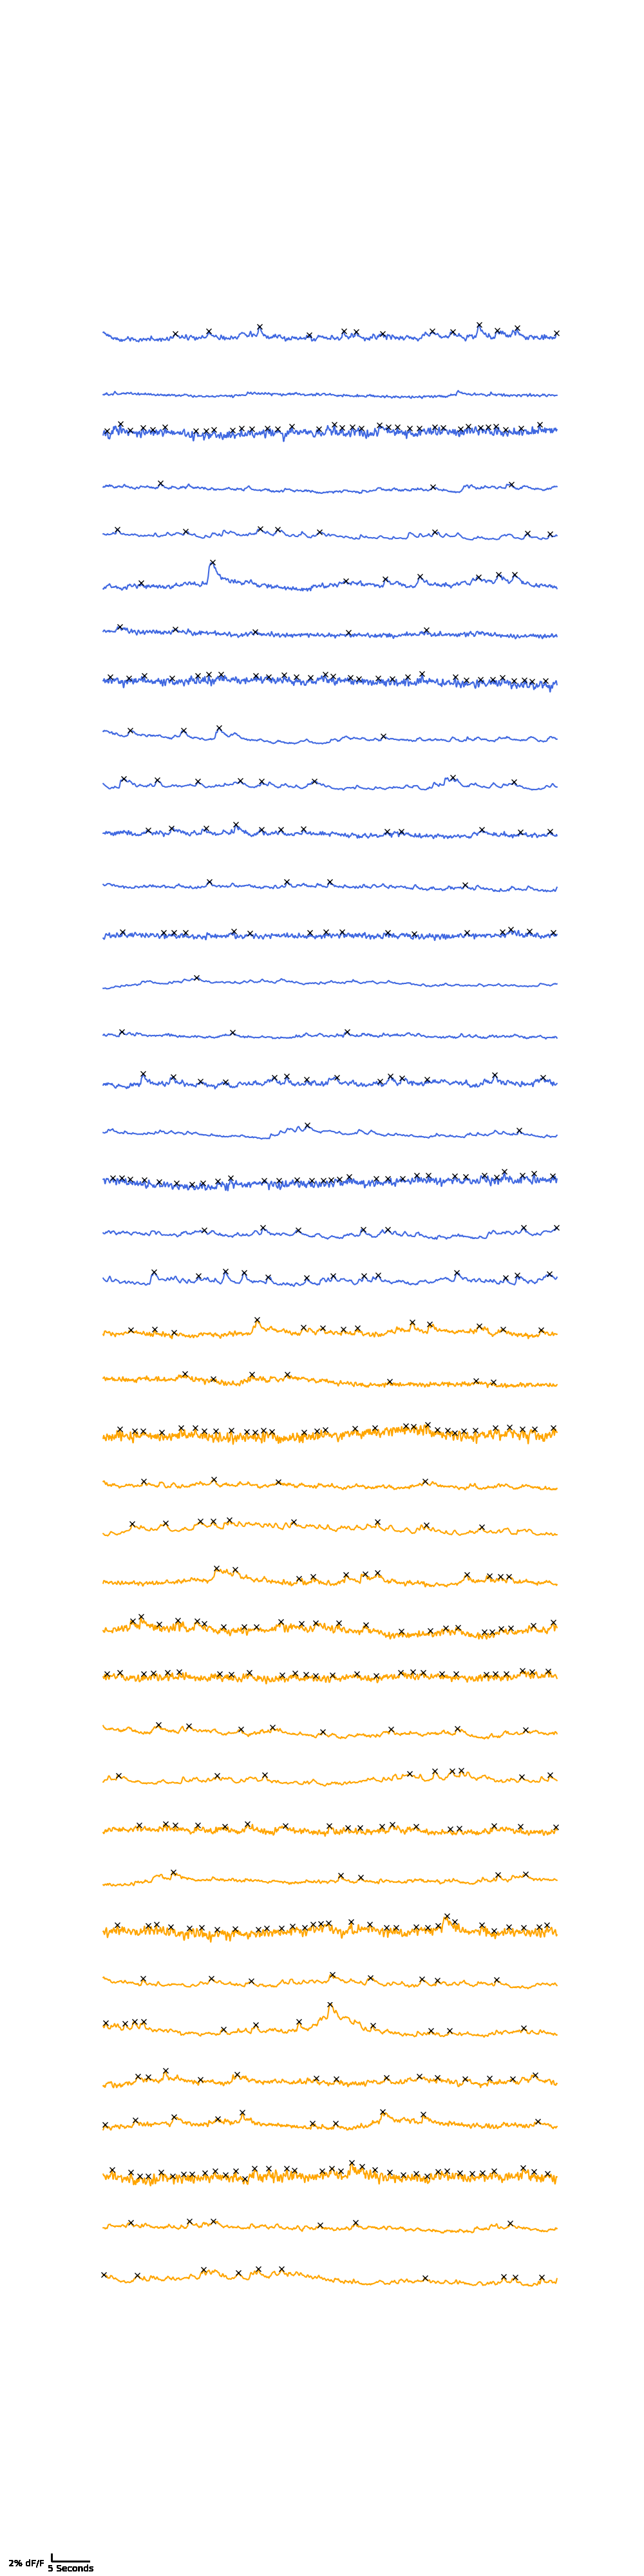

In [61]:
# Perform peak frequency and amplitude analysis
peak_freq = []
peak_amp = []
peak_h = []
peak_p = [] 
fasted = [path for folder in [tea_ball_food_fasted, tea_ball_object_fasted, food_drop_fasted, ob_drop_fasted] for path in folder]
unfasted = [path for folder in [tea_ball_food_unfasted, tea_ball_object_unfasted, food_drop_unfasted, ob_drop_unfasted] for path in folder]

fig, axes = plt.subplots(40, figsize=(10,40), sharey=True)
paths_fasted = [ob_drop_fasted[0], tea_ball_food_fasted[-1], tea_ball_object_fasted[2], food_drop_fasted[1]]
paths_unfasted = [food_drop_unfasted[3], ob_drop_unfasted[-1], tea_ball_food_unfasted[-1], tea_ball_object_unfasted[-2]]

for i in range(len(fasted)):
    path = fasted[i]
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')

    smooth_signal = zerophase_filter(signal)
    smooth_isos = zerophase_filter(isos)
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        smooth_signal = smooth_signal[:len(smooth_isos)]
        time = time[:-1]
    scaled_isos = linear_fitting(smooth_isos, smooth_signal, 'simple')
    dFF = delta_FF(scaled_isos, smooth_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, time, method='mean')
    
    peak_idx, properties = ss.find_peaks(zdFF, distance=1000, height=0, prominence=1.4)#, wlen=1000)
    #peaks_occurrences, arr, peaksInd, result = find_peaks2(zdFF, time, streamrate, window=10, highAmpFilt=2, transientsThresh=3, numProcesses=1)    
    
    #Calculate frequency and amplitude for peaks in first 5 min 
    t = []
    for k in range(len(peak_idx)):
        if 60 < time[peak_idx[k]] < 120:
            t.append(k) #get index of peak_idx
    timeframe_peak_idx = [peak_idx[k] for k in t] #get index of zdFF peaks 
    
    peak_zdFF = [zdFF[idx] for idx in timeframe_peak_idx]
    peak_time = [time[idx] for idx in timeframe_peak_idx]


    #peak_idx = [idx for idx in peak_idx if ((time[idx] > 60) & (time[idx] < 120))]
    #peak_times = time[peak_idx]
    #peak_dFF = zdFF[peak_idx]
    #print(f'Peaks/Min: {arr[0][0]}')
    #print(f'Amplitude of Peaks: {arr[0][1]}')

    #peak_freq.append(arr[0][0])
    #peak_amp.append(arr[0][1])
    idx = np.where((time > 60)& (time < 120))[0]
    zdFF = zdFF[idx]
    time = time[idx]
    
    axes[i].plot(time, zdFF, c='royalblue')
    axes[i].plot(peak_time, peak_zdFF, 'x', c='black',  lw=10)
    axes[i].spines.right.set_visible(False)
    axes[i].spines.top.set_visible(False)
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_ticks_position('bottom')
    sb = add_scalebar(axes[i], matchx=False, sizex=5, labelx='5 Seconds', matchy=False, sep=4, sizey=2, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


for i in range(len(unfasted)):
    path = unfasted[i]
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')

    smooth_signal = zerophase_filter(signal)
    smooth_isos = zerophase_filter(isos)
    if path == '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#4(#61)_food drop(fasted)_600s-221201-132901':
        smooth_signal = smooth_signal[:len(smooth_isos)]
        time = time[:-1]
    scaled_isos = linear_fitting(smooth_isos, smooth_signal, 'simple')
    dFF = delta_FF(scaled_isos, smooth_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, time, method='mean')
    
    peak_idx, properties = ss.find_peaks(zdFF, distance=1000, height=0, prominence=1.4)#, wlen=1000)
    #peaks_occurrences, arr, peaksInd, result = find_peaks2(zdFF, time, streamrate, window=10, highAmpFilt=2, transientsThresh=3, numProcesses=1)    
    
    #Calculate frequency and amplitude for peaks in first 5 min 
    t = []
    for k in range(len(peak_idx)):
        if 60 < time[peak_idx[k]] < 120:
            t.append(k) #get index of peak_idx
    timeframe_peak_idx = [peak_idx[k] for k in t] #get index of zdFF peaks 
    
    peak_zdFF = [zdFF[idx] for idx in timeframe_peak_idx]
    peak_time = [time[idx] for idx in timeframe_peak_idx]

    #peak_idx = [idx for idx in peak_idx if ((time[idx] > 60) & (time[idx] < 120))]
    #peak_times = time[peak_idx]
    #peak_dFF = zdFF[peak_idx]
    #print(f'Peaks/Min: {arr[0][0]}')
    #print(f'Amplitude of Peaks: {arr[0][1]}')

    #peak_freq.append(arr[0][0])
    #peak_amp.append(arr[0][1])
    idx = np.where((time > 60)& (time < 120))[0]
    zdFF = zdFF[idx]
    time = time[idx]
    
    i += 20
    axes[i].plot(time, zdFF, c='orange')
    axes[i].plot(peak_time, peak_zdFF, 'x', c='black',  lw=10)
    axes[i].spines.right.set_visible(False)
    axes[i].spines.top.set_visible(False)
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_ticks_position('bottom')
    sb = add_scalebar(axes[i], matchx=False, sizex=5, labelx='5 Seconds', matchy=False, sep=4, sizey=2, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

plt.savefig('AllFrequencies.pdf')

#print(peak_freq)
#print(peak_h)
#print(peak_p)

In [ ]:
# Calculate mean dF/F or AUC for experiments
# --> Use get_mean() for mean, get_AUC() for area under curve
auc1 = []
auc2 = []
auc3 = []
auc4 = []
all_paths = [path for folder in [tea_ball_food_fasted, tea_ball_food_unfasted, tea_ball_object_fasted, tea_ball_object_unfasted] for path in folder]
fileending = '/GroomingOnsetDataMean.h5'
view_window = [-60, 180]

paths = tea_ball_food_fasted 
df, mean, sem = group_analysis(paths, fileending, shade='sem')
mean = mean[:-1]
df = df.dropna() 
sem = sem[:-1]
time = np.linspace(view_window[0], view_window[1], num=len(mean))

for i in df.columns:
    signal = np.array(df[i].to_list()) 
    auc1.append(get_AUC(time, signal, -60, 0)) 
    auc2.append(get_AUC(time, signal, 0, 60)) 
print('--')


# paths = food_drop_unfasted 
# df, mean, sem = group_analysis(paths, fileending, shade='sem')
# mean = mean[:-1]
# df = df.dropna() 
# sem = sem[:-1]
# time = np.linspace(view_window[0], view_window[1], num=len(mean))

# for i in df.columns:
#     signal = np.array(df[i].to_list()) 
#     auc2.append(get_AUC(time, signal, 0, 180) - get_AUC(time, signal, -60, 0)) 
# print('--')


# paths = ob_drop_fasted 
# df, mean, sem = group_analysis(paths, fileending, shade='sem')
# mean = mean[:-1]
# df = df.dropna() 
# sem = sem[:-1]
# time = np.linspace(view_window[0], view_window[1], num=len(mean))

# for i in df.columns:
#     signal = np.array(df[i].to_list()) 
#     auc3.append(get_AUC(time, signal, 0, 180) - get_AUC(time, signal, -60, 0)) 
# print('--')


# paths = ob_drop_unfasted 
# df, mean, sem = group_analysis(paths, fileending, shade='sem')
# mean = mean[:-1]
# df = df.dropna() 
# sem = sem[:-1]
# time = np.linspace(view_window[0], view_window[1], num=len(mean))

# for i in df.columns:
#     signal = np.array(df[i].to_list()) 
#     auc4.append(get_AUC(time, signal, 0, 180) - get_AUC(time, signal, -60, 0)) 
# print('--')



In [ ]:
# Print values separately from computation 
print(auc1) #food_fasted 
print(auc2) #food_unfasted 
print(auc3) #object_fasted 
print(auc4) #object_unfasted 

 

In [ ]:
# Print values separately from computation 
print(auc1) #food_fasted 
print(auc2) #food_unfasted 
print(auc3) #object_fasted 
print(auc4) #object_unfasted 



####AUC